
This notebook uses the output of the rule
--- 75_assm_stats.smk::aggregate_quast_reports
--- 20_preprocessing.smk::compute_grch38_seq_stats (results hard-coded in this NB)
as input, and produces panels for figure 1.

Execution directory:  /home/local/work/code/github/project-male-assembly/notebooks/plotting/assm_stats
Working directory:  /home/local/work/data/sig_chrY/paper
Output directory:  /home/local/work/data/sig_chrY/paper/output/figures


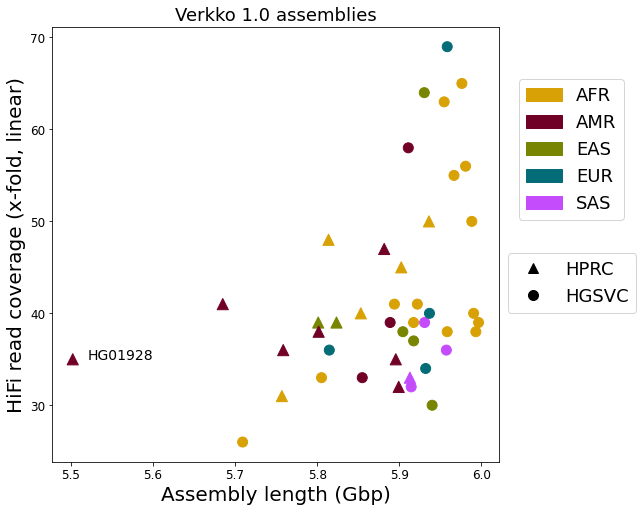

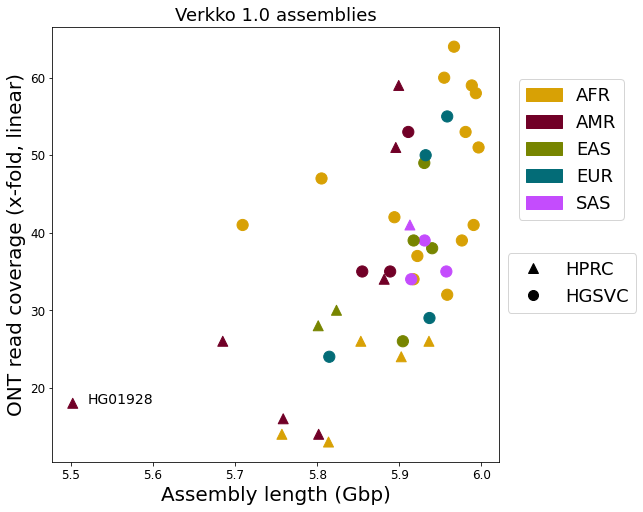

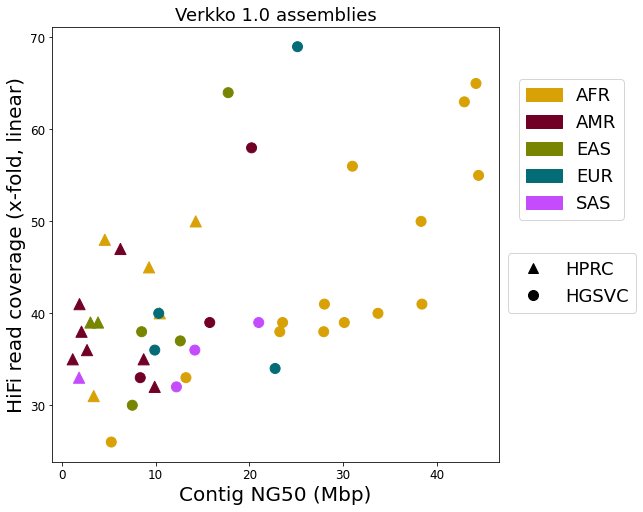

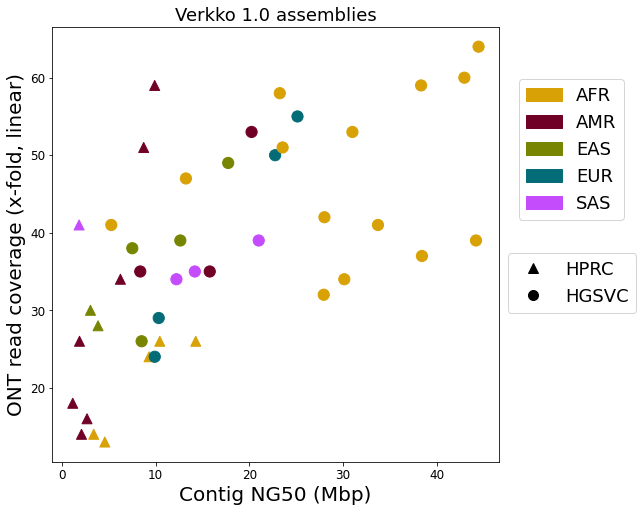

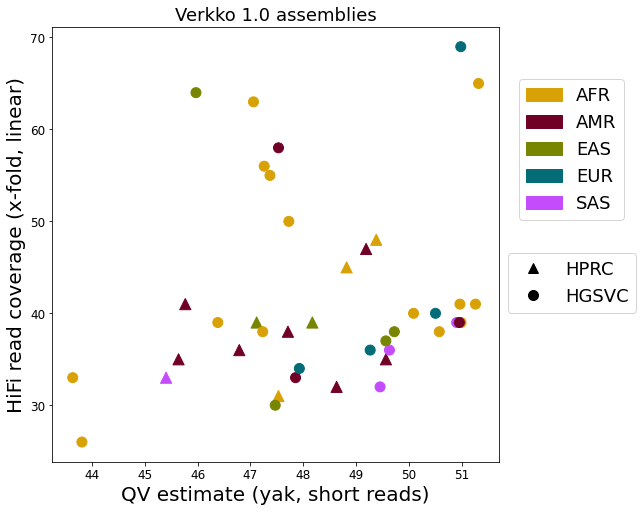

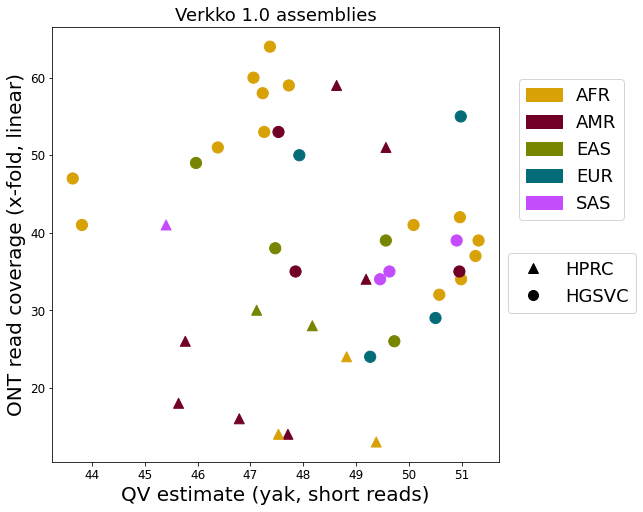

In [8]:
%matplotlib inline
import pathlib as pl

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

desc="""
This notebook uses the output of the rule
--- 75_assm_stats.smk::aggregate_quast_reports
--- 20_preprocessing.smk::compute_grch38_seq_stats (results hard-coded in this NB)
as input, and produces panels for figure 1.
"""

save_plots = True

print(desc)

repo_dir = pl.Path('/home/local/work/code/github/project-male-assembly').resolve(strict=True)
exec_dir = pl.Path('.').resolve(strict=True)
wd_dir = pl.Path('/home/local/work/data/sig_chrY/paper')
out_dir = pl.Path('/home/local/work/data/sig_chrY/paper/output/figures').resolve(strict=True)

print('Execution directory: ', exec_dir)
print('Working directory: ', wd_dir)
print('Output directory: ', out_dir)
print('=================================')

drop_samples = [
    'HG02666',
    'HG01457',
    'NA19384',
    'NA18989',
    'NA24385'
]

quast_table_dir = (wd_dir / pl.Path('stats/quast_reports')).resolve(strict=True)

table_file = quast_table_dir / pl.Path('SAMPLES.HIFIRW.ONTUL.na.wg.quast-report.tsv')
table_file = table_file.resolve(strict=True)

read_stats_file = (wd_dir / pl.Path('read_stats', 'SAMPLES.READS.read-stats.tsv')).resolve(strict=True)
read_stats = pd.read_csv(read_stats_file, header=0, sep='\t')

qv_est_file = (wd_dir / pl.Path('stats/qv_est', 'SAMPLES.HIFIRW.ONTUL.na.wg.yak-qv.tsv')).resolve(strict=True)
qv_est = pd.read_csv(qv_est_file, header=0, sep='\t', comment='#')

annotations_file = repo_dir / pl.Path('data/sample_pop_color.v2.tsv')
colors = pd.read_csv(annotations_file, sep='\t', header=0)

df = pd.read_csv(table_file, sep='\t', header=0)

df = df.merge(read_stats, left_on='sample', right_on='sample', how='outer')
df = df.merge(qv_est, left_on='sample', right_on='sample', how='outer')

df = df.loc[~df['sample'].isin(drop_samples), :].copy().reset_index(inplace=False, drop=True)
colors = colors.loc[colors['workflow_sample'].isin(df['sample']), :].copy()


hprc_samples = """
HG03579
HG01952
HG01243
HG00673
HG03492
HG01358
HG01258
HG02572
HG02717
HG01928
HG01106
HG00621
HG01109
HG02486
HG03471
"""
hprc_samples = hprc_samples.strip().split()

hprc = df.loc[df['sample'].isin(hprc_samples), :].copy()
# color: royalblue
hgsvc = df.loc[~df['sample'].isin(hprc_samples), :].copy()

high_cov = [
    'HG01890',
    'HC02666',
    'HC01457',
    'HC18989',
    'HC19384',
    'NA19317',
    'NA19347',
    'HG00358',
    'HG03471'
]

use_project_marker = True

hgsvc_hc = hgsvc.loc[hgsvc['sample'].isin(high_cov), :].copy()
# color: limegreen
hgsvc_nm = hgsvc.loc[~hgsvc['sample'].isin(high_cov), :].copy()
# color: limegreen

# 2022-07-26 change coloring to super population,
# distinguish high-coverage from regular coverage
# by marker style

# switch between project and coverage markers
if use_project_marker:
    highcov = df.loc[df['sample'].isin(hprc_samples), :].copy()
    highcov_colors = colors.loc[colors['workflow_sample'].isin(hprc_samples), :].copy()
else:
    highcov = df.loc[df['sample'].isin(high_cov), :].copy()
    highcov_colors = colors.loc[colors['workflow_sample'].isin(high_cov), :].copy()


highcov = highcov.merge(highcov_colors, left_on='sample', right_on='workflow_sample', how='outer')
highcov_colors = []
for row in highcov.itertuples():
    if row.read_type == 'HIFIRW':
        highcov_colors.append(
            (
                round(row.superpop_color_red, 3),
                round(row.superpop_color_green, 3),
                round(row.superpop_color_blue, 3)
            )
        )

if use_project_marker:
    normcov = df.loc[~df['sample'].isin(hprc_samples), :].copy()
    normcov_colors = colors.loc[~colors['workflow_sample'].isin(hprc_samples), :].copy()
else:
    normcov = df.loc[~df['sample'].isin(high_cov), :].copy()
    normcov_colors = colors.loc[~colors['workflow_sample'].isin(high_cov), :].copy()

normcov = normcov.merge(normcov_colors, left_on='sample', right_on='workflow_sample', how='outer')

normcov_colors = []
for row in normcov.itertuples():
    if row.read_type == 'HIFIRW':
        normcov_colors.append(
            (
                round(row.superpop_color_red, 3),
                round(row.superpop_color_green, 3),
                round(row.superpop_color_blue, 3)
            )
        )

if use_project_marker:
    label_caret = 'HPRC'
    label_circle = 'HGSVC'
else:
    label_caret = 'High-cov. samples'
    label_circle = '(other samples)'
        
marker_legend_ng50 = [
    Line2D([0], [0], color='black', marker='^', lw=0, label=label_caret, ms=10),
    Line2D([0], [0], color='black', marker='o', lw=0, label=label_circle, ms=10),
    #Line2D([0], [0], color='black', marker='s', lw=0, label='T2T-Y', ms=10),
    #Line2D([0], [0], color='black', marker='D', lw=0, label='GRCh38\n(non-N N50)', ms=10),
]

marker_legend_num = [
    Line2D([0], [0], color='black', marker='^', lw=0, label=label_caret, ms=10),
    Line2D([0], [0], color='black', marker='o', lw=0, label=label_circle, ms=10),
    #Line2D([0], [0], color='black', marker='s', lw=0, label='T2T-Y', ms=10),
    #Line2D([0], [0], color='black', marker='D', lw=0, label='GRCh38\n(non-N)', ms=10),
]

spop_colors = colors.drop_duplicates('super_population').sort_values('super_population', inplace=False)
color_legend = []
for row in spop_colors.itertuples():
    r = round(row.superpop_color_red, 3)
    g = round(row.superpop_color_green, 3)
    b = round(row.superpop_color_blue, 3)
    color_legend.append(
        Patch(facecolor=(r,g,b), edgecolor=(r,g,b), label=row.super_population),
    )

hifi_hc = highcov['read_type'] == 'HIFIRW'
ont_hc = highcov['read_type'] == 'ONTUL'

hifi_nc = normcov['read_type'] == 'HIFIRW'
ont_nc = normcov['read_type'] == 'ONTUL'

#################
#################
#################

fig, ax = plt.subplots(figsize=(8,8))
fig_name = 'wg_assm_hifi-v-length'

ax.scatter(
    highcov.loc[hifi_hc, 'assembly_length_bp'] / 1e9,
    highcov.loc[hifi_hc, 'cov_geq_0bp_T2TXYM_linear'],
    s=125,
    c=highcov_colors,
    label='high cov.',
    marker='^'
)

ax.scatter(
    normcov.loc[hifi_nc, 'assembly_length_bp'] / 1e9,
    normcov.loc[hifi_nc, 'cov_geq_0bp_T2TXYM_linear'],
    s=100,
    c=normcov_colors,
    label='regular cov.',
    marker='o'
)

ax.set_title('Verkko 1.0 assemblies', fontsize=18)
ax.set_xlabel('Assembly length (Gbp)', fontsize=20)
ax.set_ylabel('HiFi read coverage (x-fold, linear)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12)

leg1 = ax.legend(handles=marker_legend_ng50, loc='best', fontsize=18)
if use_project_marker:
    leg1.set_bbox_to_anchor((1., 0.5), transform = ax.transAxes)
else:
    leg1.set_bbox_to_anchor((1.55, 0.5), transform = ax.transAxes)

leg2 = ax.legend(handles=color_legend, loc='best', fontsize=18)
leg2.set_bbox_to_anchor((1.3, 0.9), transform = ax.transAxes)
plt.gca().add_artist(leg1)

ax.text(
    5.52,
    35,
    s='HG01928',
    fontsize=14
)

if save_plots:
    plt.savefig(
        out_dir / pl.Path(f'{fig_name}.png'),
        dpi=150, bbox_inches='tight', transparent=None,
        bbox_extra_artists=[leg1, leg2], facecolor="w"
    )
    plt.savefig(
        out_dir / pl.Path(f'{fig_name}.pdf'),
        bbox_inches='tight', transparent=None,
        bbox_extra_artists=[leg1, leg2], facecolor="w"
    )

#################
#################
#################

fig, ax = plt.subplots(figsize=(8,8))
fig_name = 'wg_assm_ont-v-length'

ax.scatter(
    highcov.loc[ont_hc, 'assembly_length_bp'] / 1e9,
    highcov.loc[ont_hc, 'cov_geq_0bp_T2TXYM_linear'],
    s=100,
    c=highcov_colors,
    label='high cov.',
    marker='^'
)

ax.scatter(
    normcov.loc[ont_nc, 'assembly_length_bp'] / 1e9,
    normcov.loc[ont_nc, 'cov_geq_0bp_T2TXYM_linear'],
    s=125,
    c=normcov_colors,
    label='regular cov.',
    marker='o'
)

ax.set_title('Verkko 1.0 assemblies', fontsize=18)
ax.set_xlabel('Assembly length (Gbp)', fontsize=20)
ax.set_ylabel('ONT read coverage (x-fold, linear)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12)

leg1 = ax.legend(handles=marker_legend_num, loc='best', fontsize=18)
if use_project_marker:
    leg1.set_bbox_to_anchor((1., 0.5), transform = ax.transAxes)
else:
    leg1.set_bbox_to_anchor((1.55, 0.5), transform = ax.transAxes)

leg2 = ax.legend(handles=color_legend, loc='best', fontsize=18)
leg2.set_bbox_to_anchor((1.3, 0.9), transform = ax.transAxes)
plt.gca().add_artist(leg1)

ax.text(
    5.52,
    18,
    s='HG01928',
    fontsize=14
)

if save_plots:

    plt.savefig(
        out_dir / pl.Path(f'{fig_name}.png'),
        dpi=150, bbox_inches='tight', transparent=None,
        bbox_extra_artists=[leg1, leg2], facecolor="w"
    )

    plt.savefig(
        out_dir / pl.Path(f'{fig_name}.pdf'),
        bbox_inches='tight', transparent=None,
        bbox_extra_artists=[leg1, leg2], facecolor="w"
    )

#####################################
# CONTIG NG50
#####################################

fig, ax = plt.subplots(figsize=(8,8))
fig_name = 'wg_assm_hifi-v-ng50'

ax.scatter(
    highcov.loc[hifi_hc, 'contig_NG50'] / 1e6,
    highcov.loc[hifi_hc, 'cov_geq_0bp_T2TXYM_linear'],
    s=125,
    c=highcov_colors,
    label='high cov.',
    marker='^'
)

ax.scatter(
    normcov.loc[hifi_nc, 'contig_NG50'] / 1e6,
    normcov.loc[hifi_nc, 'cov_geq_0bp_T2TXYM_linear'],
    s=100,
    c=normcov_colors,
    label='regular cov.',
    marker='o'
)

ax.set_title('Verkko 1.0 assemblies', fontsize=18)
ax.set_xlabel('Contig NG50 (Mbp)', fontsize=20)
ax.set_ylabel('HiFi read coverage (x-fold, linear)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12)

leg1 = ax.legend(handles=marker_legend_ng50, loc='best', fontsize=18)
if use_project_marker:
    leg1.set_bbox_to_anchor((1., 0.5), transform = ax.transAxes)
else:
    leg1.set_bbox_to_anchor((1.55, 0.5), transform = ax.transAxes)

leg2 = ax.legend(handles=color_legend, loc='best', fontsize=18)
leg2.set_bbox_to_anchor((1.3, 0.9), transform = ax.transAxes)
plt.gca().add_artist(leg1)

if save_plots:
    plt.savefig(
        out_dir / pl.Path(f'{fig_name}.png'),
        dpi=150, bbox_inches='tight', transparent=None,
        bbox_extra_artists=[leg1, leg2], facecolor="w"
    )
    plt.savefig(
        out_dir / pl.Path(f'{fig_name}.pdf'),
        bbox_inches='tight', transparent=None,
        bbox_extra_artists=[leg1, leg2], facecolor="w"
    )

#################
#################
#################

fig, ax = plt.subplots(figsize=(8,8))
fig_name = 'wg_assm_ont-v-ng50'

ax.scatter(
    highcov.loc[ont_hc, 'contig_NG50'] / 1e6,
    highcov.loc[ont_hc, 'cov_geq_0bp_T2TXYM_linear'],
    s=100,
    c=highcov_colors,
    label='high cov.',
    marker='^'
)

ax.scatter(
    normcov.loc[ont_nc, 'contig_NG50'] / 1e6,
    normcov.loc[ont_nc, 'cov_geq_0bp_T2TXYM_linear'],
    s=125,
    c=normcov_colors,
    label='regular cov.',
    marker='o'
)

ax.set_title('Verkko 1.0 assemblies', fontsize=18)
ax.set_xlabel('Contig NG50 (Mbp)', fontsize=20)
ax.set_ylabel('ONT read coverage (x-fold, linear)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12)

leg1 = ax.legend(handles=marker_legend_num, loc='best', fontsize=18)
if use_project_marker:
    leg1.set_bbox_to_anchor((1., 0.5), transform = ax.transAxes)
else:
    leg1.set_bbox_to_anchor((1.55, 0.5), transform = ax.transAxes)

leg2 = ax.legend(handles=color_legend, loc='best', fontsize=18)
leg2.set_bbox_to_anchor((1.3, 0.9), transform = ax.transAxes)
plt.gca().add_artist(leg1)

if save_plots:

    plt.savefig(
        out_dir / pl.Path(f'{fig_name}.png'),
        dpi=150, bbox_inches='tight', transparent=None,
        bbox_extra_artists=[leg1, leg2], facecolor="w"
    )

    plt.savefig(
        out_dir / pl.Path(f'{fig_name}.pdf'),
        bbox_inches='tight', transparent=None,
        bbox_extra_artists=[leg1, leg2], facecolor="w"
    )

#####################################
# QV estimate
#####################################

fig, ax = plt.subplots(figsize=(8,8))
fig_name = 'wg_assm_hifi-v-qv'

ax.scatter(
    highcov.loc[hifi_hc, 'qv'],
    highcov.loc[hifi_hc, 'cov_geq_0bp_T2TXYM_linear'],
    s=125,
    c=highcov_colors,
    label='high cov.',
    marker='^'
)

ax.scatter(
    normcov.loc[hifi_nc, 'qv'],
    normcov.loc[hifi_nc, 'cov_geq_0bp_T2TXYM_linear'],
    s=100,
    c=normcov_colors,
    label='regular cov.',
    marker='o'
)

ax.set_title('Verkko 1.0 assemblies', fontsize=18)
ax.set_xlabel('QV estimate (yak, short reads)', fontsize=20)
ax.set_ylabel('HiFi read coverage (x-fold, linear)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12)

leg1 = ax.legend(handles=marker_legend_ng50, loc='best', fontsize=18)
if use_project_marker:
    leg1.set_bbox_to_anchor((1., 0.5), transform = ax.transAxes)
else:
    leg1.set_bbox_to_anchor((1.55, 0.5), transform = ax.transAxes)

leg2 = ax.legend(handles=color_legend, loc='best', fontsize=18)
leg2.set_bbox_to_anchor((1.3, 0.9), transform = ax.transAxes)
plt.gca().add_artist(leg1)

if save_plots:
    plt.savefig(
        out_dir / pl.Path(f'{fig_name}.png'),
        dpi=150, bbox_inches='tight', transparent=None,
        bbox_extra_artists=[leg1, leg2], facecolor="w"
    )
    plt.savefig(
        out_dir / pl.Path(f'{fig_name}.pdf'),
        bbox_inches='tight', transparent=None,
        bbox_extra_artists=[leg1, leg2], facecolor="w"
    )

#################
#################
#################

fig, ax = plt.subplots(figsize=(8,8))
fig_name = 'wg_assm_ont-v-qv'

ax.scatter(
    highcov.loc[ont_hc, 'qv'],
    highcov.loc[ont_hc, 'cov_geq_0bp_T2TXYM_linear'],
    s=100,
    c=highcov_colors,
    label='high cov.',
    marker='^'
)

ax.scatter(
    normcov.loc[ont_nc, 'qv'],
    normcov.loc[ont_nc, 'cov_geq_0bp_T2TXYM_linear'],
    s=125,
    c=normcov_colors,
    label='regular cov.',
    marker='o'
)

ax.set_title('Verkko 1.0 assemblies', fontsize=18)
ax.set_xlabel('QV estimate (yak, short reads)', fontsize=20)
ax.set_ylabel('ONT read coverage (x-fold, linear)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12)

leg1 = ax.legend(handles=marker_legend_num, loc='best', fontsize=18)
if use_project_marker:
    leg1.set_bbox_to_anchor((1., 0.5), transform = ax.transAxes)
else:
    leg1.set_bbox_to_anchor((1.55, 0.5), transform = ax.transAxes)

leg2 = ax.legend(handles=color_legend, loc='best', fontsize=18)
leg2.set_bbox_to_anchor((1.3, 0.9), transform = ax.transAxes)
plt.gca().add_artist(leg1)

if save_plots:

    plt.savefig(
        out_dir / pl.Path(f'{fig_name}.png'),
        dpi=150, bbox_inches='tight', transparent=None,
        bbox_extra_artists=[leg1, leg2], facecolor="w"
    )

    plt.savefig(
        out_dir / pl.Path(f'{fig_name}.pdf'),
        bbox_inches='tight', transparent=None,
        bbox_extra_artists=[leg1, leg2], facecolor="w"
    )



